1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

In [6]:
# Import data

iris_df = pd.read_csv('data/iris.csv')
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [14]:
# Separate features and target

X = iris_df.iloc[:,:4].values
y = iris_df.iloc[:,-1].values.reshape(-1,1)

In [19]:
# Split training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
# Build and fit models

# k = 3
knn_mod1 = KNeighborsClassifier(n_neighbors=3)
knn_mod1.fit(X_train, y_train)

# k = 7
knn_mod2 = KNeighborsClassifier(n_neighbors=7)
knn_mod2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [24]:
# Predict plant type for two example plants using both models

plant1 = np.array([15.7,2.8,9.5,0.1]).reshape(1, 4)
plant2 = np.array([1.7,3.8,4.5,11.3]).reshape(1,4)

print('--  Plant 1  --')
print('Knn 3 neighbours =', knn_mod1.predict(plant1))
print('Knn 7 neighbours =', knn_mod2.predict(plant1))
print('-----------')
print('--  Plant 2  --')
print('Knn 3 neighbours =', knn_mod1.predict(plant2))
print('Knn 7 neighbours =', knn_mod2.predict(plant2))

--  Plant 1  --
Knn 3 neighbours = ['Virginica']
Knn 7 neighbours = ['Virginica']
-----------
--  Plant 2  --
Knn 3 neighbours = ['Virginica']
Knn 7 neighbours = ['Virginica']


In [25]:
# Check scores for both models

print('--  Knn 3 neighbours  --')
print('Training data accuracy -->', knn_mod1.score(X_train, y_train))
print('Test data accuracy -->', knn_mod1.score(X_test, y_test))
print('-------------')
print('--  Knn 7 neighbours  --')
print('Training data accuracy -->', knn_mod2.score(X_train, y_train))
print('Test data accuracy -->', knn_mod2.score(X_test, y_test))

--  Knn 3 neighbours  --
Training data accuracy --> 0.95
Test data accuracy --> 1.0
-------------
--  Knn 7 neighbours  --
Training data accuracy --> 0.9666666666666667
Test data accuracy --> 0.9666666666666667


Text(0, 0.5, 'Accuracy score')

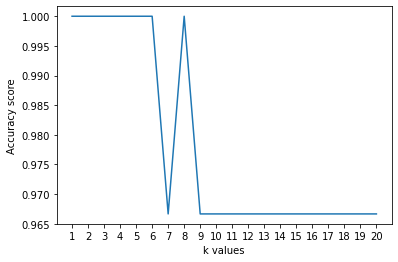

In [35]:
k_vals = list(range(1,21))
score_dict = {}

for k in k_vals:
    knn_mod = KNeighborsClassifier(n_neighbors=k)
    knn_mod.fit(X_train, y_train)
    score = knn_mod.score(X_test, y_test)
    score_dict[f'{k}'] = score

plt.plot(score_dict.keys(), score_dict.values())
plt.xlabel('k values')
plt.ylabel('Accuracy score')

### Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

knn_mod1_1 = KNeighborsClassifier(n_neighbors=3)
knn_mod1_1.fit(X_train, y_train)

print('--  Knn 3 neighbors  --')
print('Training data accuracy -->', knn_mod1_1.score(X_train, y_train))
print('Test data accuracy -->', knn_mod1_1.score(X_test, y_test))

print('-----------------------')

knn_mod2_1 = KNeighborsClassifier(n_neighbors=7)
knn_mod2_1.fit(X_train, y_train)

print('--  Knn 7 neighbors  --')
print('Training data accuracy -->', knn_mod2_1.score(X_train, y_train))
print('Test data accuracy -->', knn_mod2_1.score(X_test, y_test))

--  Knn 3 neighbors  --
Training data accuracy --> 0.9833333333333333
Test data accuracy --> 0.9444444444444444
-----------------------
--  Knn 7 neighbors  --
Training data accuracy --> 0.9833333333333333
Test data accuracy --> 0.9888888888888889


All accuracy scores have risen except for the accuracy of the test data with 3 knn neighbors. Since the training sample is now smaller we could perhaps expect a higher variability in the predictions since the model will depend on fewer dots to determine as neighbors, possibly tilting the results towards the higher amount of elements of a given class. In this case it hasn't happened like this meaning the training sample was even a better training set for predictions.

### Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?

In [48]:
iris_df_set = iris_df[iris_df['variety'] != 'Setosa']

X = iris_df_set.iloc[:,:4].values
y = iris_df_set.iloc[:,-1].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

knn_mod1_2 = KNeighborsClassifier(n_neighbors=3)
knn_mod1_2.fit(X_train, y_train)

print('--  Knn 3 neighbors  --')
print('Training data accuracy -->', knn_mod1_2.score(X_train, y_train))
print('Test data accuracy -->', knn_mod1_2.score(X_test, y_test))

print('-----------------------')

knn_mod2_2 = KNeighborsClassifier(n_neighbors=7)
knn_mod2_2.fit(X_train, y_train)

print('--  Knn 7 neighbors  --')
print('Training data accuracy -->', knn_mod2_2.score(X_train, y_train))
print('Test data accuracy -->', knn_mod2_2.score(X_test, y_test))

--  Knn 3 neighbors  --
Training data accuracy --> 0.975
Test data accuracy --> 0.8833333333333333
-----------------------
--  Knn 7 neighbors  --
Training data accuracy --> 0.975
Test data accuracy --> 0.9


For both training sets for the different models the accuracy results for training rose whilst both test accuracies fell. This suggest overfitting of the model.

#### ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

The knn algorithm makes for a good model for this particular dataset as it is clearly shown by the accuracy scores. This algorithm tends to struggle with effectiveness when dealing with bigger amounts of features to take into account, requiring an exponential growth of elements in the datasets following the increase in features (dimensionality curse). This dataset has a small amount of features and a proportianate amount of elements to apply the algorithm for making predictions.